# Final Python Project   - Cathode Ray in Television

Stefan Grueneis
PHYSICS 260

# Abstract

In old televisions, a cathode-ray tube accelerates an electron beam with a constant electric field that deflects on the screen to create the image. My driving question is how various setups of the cathode ray, such as the voltage difference and the distance between a constant electric, affect the image shown.

# Motivation

For my motivation, it will be interesting to see how a simple cathode ray operation is responsible for a major invention of the past century. It would also be cool to learn how different factors can result in different outcomes, such as the quality of an image. 

# Background

A cathode ray tube is a vacuum tube that produces an image when a cathode ray (a ray of electrons) hit a phosphorous surface, which produces an image. When a voltage is applied to a cathode, the cathode heats up and emits the electrons. That ray of electrons is then accelerated by a positively charged anode, which concentrates the electrons into the cathode ray. For a black and white television, there is only one cathode ray. For a color television, there are three cathode rays which produces red, green, and blue images that can be combined to form a multicolor image.

After the cathode ray is formed, the ray goes through a series of steering coils (the coils are just copper windings). These steering coils can produce a magnetic field, which will impact the trajectory of the electrons. By varying the voltage on the steering coils, the electron ray can be positioned to any spot on the screen. For a black and white TV, the white phosphor is coated on the screen. The ray will "paint" an image from the left to the right. When the line is done, the ray will move down slightly back to the left in what is called a horizontal retrace. Once the last line of the screen is filled at the bottom right, the ray will move back up to the top left (vertical retrace) and the process restarts. The screen is painted 60 times per second. This fast process makes the image on the TV appear continuous, which is called the persistence of vision.

When a ray "paints" a screen, it will skip a line each time. For one part, the ray will just skip one line per horizontal retrace. When the process starts again, the ray will go over the lines that were previously skipped.



# Part 1: Varying Voltage

For this part, the distance between the cathode and the anode will be 50 mm. We also will not include a magnetic field, so the electron will just be travel a pathway to the center of the screen. When the electron is accelerated through the electric field, the work done on the initially at rest electron is $ eV $. Once the electron hits the phospote screen, the total energy of the electron will be converted to a photon, whose energy is equal to $ hf = \frac{hc}{\lambda} $. The wavelength range of visible light is from 380 to 700 nm. The wavelength of the photon should be in that range so that the energy is released as visible light. 

In [2]:
#imput usual libraries
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#set constants
c = 3e8
h = 6.626e-34
e = 1.6e-19

Text(0.5, 1.0, 'Voltage Difference vs. Wavelength of Electron Released Energy')

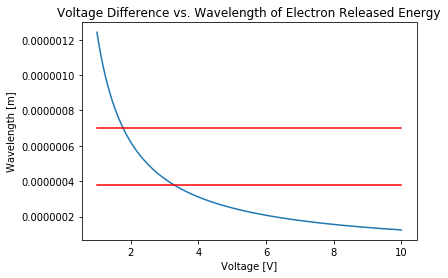

In [4]:
voltage = np.linspace(1,10,1000)

def work_on_particle(V):
    W = e*V
    return W

def wavelength_of_photon(E):
    wavelength = (h*c)/E
    return wavelength

energy = work_on_particle(voltage)
wavelength = wavelength_of_photon(energy)

lowest_wavelength = 380e-9*np.ones(np.shape(voltage))
highest_wavelength = 700e-9*np.ones(np.shape(voltage))

plt.plot(voltage,wavelength)
plt.plot(voltage,lowest_wavelength,color='r',label = 'Lowest Wavelength')

plt.plot(voltage,highest_wavelength,color='r',label = 'Highest Wavelength')
plt.xlabel('Voltage [V]')
plt.ylabel('Wavelength [m]')
plt.title('Voltage Difference vs. Wavelength of Electron Released Energy')


The lower redline is equal to 380 nm, while the higher redline is equal to 700 nm. The range in between is where the voltage needs to be so that visible light can be emitted. From a cursorary glance, it looks like the voltage needs to be inbetween a little less than 2 V and around 3.5 V. The code block below determines what the exact range is.

In [5]:
def return_voltage(wavelength):
    E = (h*c)/wavelength
    V = E/e
    return V

print('The range of voltage for an electron to emit light in this scenario is [',
      return_voltage(700e-9),',',return_voltage(380e-9),']')

The range of voltage for an electron to emit light in this scenario is [ 1.7748214285714285 , 3.269407894736842 ]


For the electron to emit light, the voltage must be from 1.7748 V to 3.269 V. This is consistent with the Voltage vs. Wavelength graph above.

# Part 2: Magnetic Field Impact on Electron Position

However, in a CRT Television, the image has to form in all sections of the screen, not just the center. The magnetic coils are responsible for changing the electron pathway so that it can hit all areas of the screen. This part of the project is to see how the strength and direction of the magnetic field impacts the angle from the center where the electron hits the screen. To approximate the results, the magnetic field will be constant, and we will only focus on the cross section of the tube. A more complex analysis would focus on the three dimensional quality of the screen. Also, to keep the quanities same throughout, the voltage will just be 2.5 V. The electron should still be able to hit the screen and emit light, since no work is done in the magnetic field area. In a magnetic field, the magnetic force on a charged particle is always orthogonal to the velocity of the particle, and since $ W = \vec{F} \cdot \vec{d} $, $ W = 0$.

In [6]:
#set constants
e = 1.6e-19
m = 9.11e-31

#Set constant voltage
voltage = 2.5

#get initial velocity
v_0 = np.sqrt((2*e*voltage)/m)



In [7]:
#set functions to get values and arrays
def magnetic_force(v,B):
    F = e*np.cross(v,B)
    return F

def get_magnetic_field(B):
    B_vector = np.array([0,0,B])
    return B_vector

def get_arctan(v):
    x = v[1]/v[0]
    return np.arctan(x)

def get_updated_value(current_value,rate_of_change,dt):
    new_value = current_value + rate_of_change*dt
    return new_value

def get_acceleration(F):
    a = F/m
    return a 

def create_placeholder_array(timesteps):
    shape = np.shape(timesteps)
    shape = shape[0]
    evolution =  np.zeros([shape,3])
    return evolution

In [8]:
timesteps = np.linspace(0,1,1000)
dt = timesteps[1]
s_initial = np.array([0,0,0])
v_initial = np.array([v_0,0,0])

print(create_placeholder_array(timesteps))

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 ...
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [9]:
position_array = create_placeholder_array(timesteps)
velocity_array = create_placeholder_array(timesteps)
x_max = 0.01
v = v_initial
s = s_initial

def calculate_trajectory_for_field(B):
    v = v_initial
    s = s_initial 
    
    for inum, timestep in enumerate(timesteps):
        
        velocity_array[inum] = v
        position_array[inum] = s
        
        if position_array[inum][0] < x_max:
            field = np.array([0,0,B])
            F = magnetic_force(v,field)
            a = get_acceleration(F)
            v = get_updated_value(v,a,dt)
            s = get_updated_value(s,v,dt)
        else:
            field = np.array([0,0,0])
            F = magnetic_force(v,field)
            a = get_acceleration(F)
            v = get_updated_value(v,a,dt)
            s = get_updated_value(s,v,dt)
    
    velocity_final = velocity_array[-1]
    arctan = get_arctan(velocity_final)
    return arctan
    
    

In [11]:
#testing to see if function works
final = calculate_trajectory_for_field(0)
final1 = calculate_trajectory_for_field(1e-8)
final2 = calculate_trajectory_for_field(1)
print(final)
print(final1)
print(final2)

0.0
-1.0536297446854912
-1.5707963211068403


In [20]:
xaxis = np.linspace(-1e-7,1e-7,100)
yaxis = np.zeros(np.shape(xaxis))
shape = np.arange(0,np.shape(xaxis)[0])

#populating yaxis
for i in shape:
    B = calculate_trajectory_for_field(xaxis[i])
    yaxis[i] = B
    

Text(0, 0.5, 'Angle of Deflection [rad]')

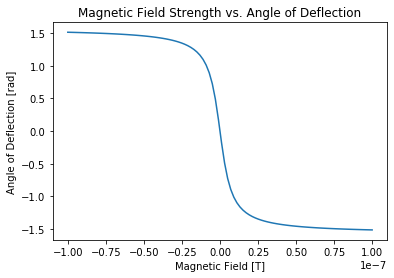

In [25]:
plt.plot(xaxis,yaxis)
plt.title("Magnetic Field Strength vs. Angle of Deflection")
plt.xlabel("Magnetic Field [T]")
plt.ylabel("Angle of Deflection [rad]")

# Links 

https://electronics.howstuffworks.com/tv3.htm
https://www.thoughtco.com/television-history-cathode-ray-tube-1991459
https://www.britannica.com/technology/cathode-ray-tube
https://www.testandmeasurementtips.com/the-difference-between-cathode-ray-tube-and-flat-screen-displays-in-oscilloscopes-faq/
https://www.youtube.com/watch?v=dlT-seESkj0
https://www.youtube.com/watch?v=l4UgZBs7ZGo
https://www.britannica.com/science/luminescence
https://science.nasa.gov/ems/09_visiblelight
https://www.sciencedirect.com/topics/engineering/magnetic-deflection
